In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_spotify = pd.read_csv("data/spotify_2020+.csv")
df_billboard = pd.read_csv("data/billboardCharts.csv")

In [3]:
df_spotify.shape

(11496684, 11)

In [4]:
df_billboard.shape

(330087, 7)

# Exploratory data analysis

We have to seperate the two types of charts into seperate dataframes.

In [5]:
df_spotify['chart'].unique()

array(['top200', 'viral50'], dtype=object)

In [6]:
df_viral50 = df_spotify[df_spotify['chart'] == 'viral50']
df_viral50.shape

(2510831, 11)

In [7]:
df_top200 = df_spotify[df_spotify['chart'] == 'top200']
df_top200.shape

(8985853, 11)

## Viral50

First we will take a look at Viral50 because this data will be used to predict the movement of positions in the Top200 Charts.

In [8]:
df_viral50.head()

,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
1491502,1491502,25000000,The Red Means I Love You,29,2021-11-03,Madds Buckley,https://open.spotify.com/track/5pLbM4PU1wZyMvo...,Romania,viral50,MOVE_DOWN,NaN
1491503,1491503,25000001,Close Eyes,30,2021-11-03,DVRST,https://open.spotify.com/track/3CLSHJv5aUROAN2...,Romania,viral50,MOVE_DOWN,NaN
1491504,1491504,25000002,Jugaste y Sufrí,31,2021-11-03,"Eslabon Armado, DannyLux",https://open.spotify.com/track/3NqBxTOMCJ3zW9C...,Romania,viral50,SAME_POSITION,NaN
1491505,1491505,25000003,The Feels,32,2021-11-03,TWICE,https://open.spotify.com/track/6pgqZ7Iw4LfHlfg...,Romania,viral50,MOVE_DOWN,NaN
1491506,1491506,25000004,"Spooky, Scary Skeletons - Undead Tombstone Remix",33,2021-11-03,Andrew Gold,https://open.spotify.com/track/1sUdq3kWa9dJXHu...,Romania,viral50,MOVE_DOWN,NaN


In [9]:
df_viral50.groupby('region').nunique()

,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,chart,trend,streams
region,,,,,,,,,,
Andorra,36546,36546,1806,50,731,1230,1958,1,4,0
Argentina,36532,36532,1712,50,731,1361,1853,1,4,0
Australia,36536,36536,1745,51,731,1360,1946,1,4,0
Austria,36536,36536,2024,50,731,1681,2213,1,4,0
Belgium,36536,36536,2119,50,731,1737,2331,1,4,0
...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,36550,36550,1514,50,731,1086,1672,1,4,0
United Kingdom,36536,36536,1845,50,731,1441,2033,1,4,0
United States,36532,36532,1906,50,731,1396,2114,1,4,0


Text(0, 0.5, 'Frequency')

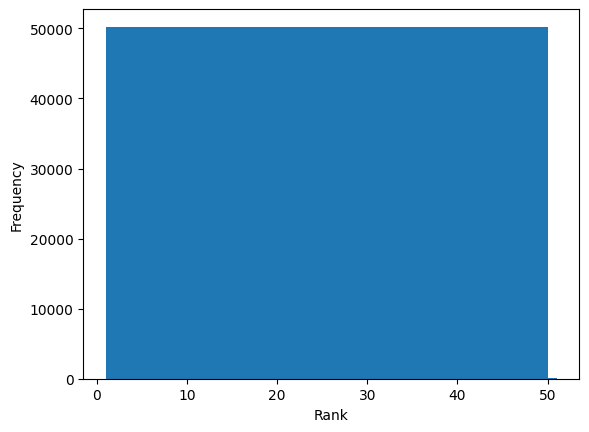

In [10]:
plt.hist(df_viral50['rank'], bins=51)
plt.xlabel("Rank")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

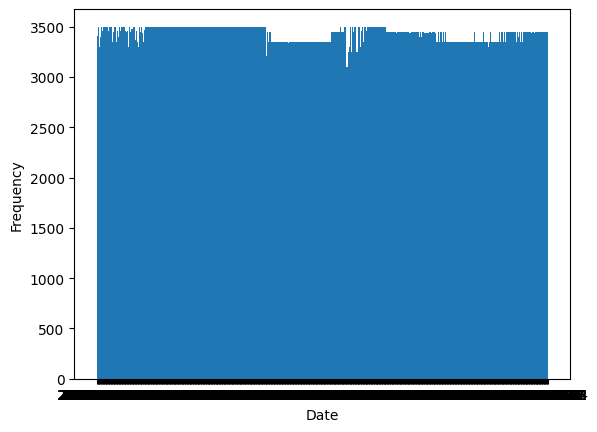

In [11]:
plt.hist(df_viral50['date'], bins=df_viral50['date'].nunique())
plt.xlabel("Date")
plt.ylabel("Frequency")

Dataset looks to have no critical missing data in regards to rank and date.

### USA
First try with USA to get a feel on how to work with the dataset

In [12]:
df_USA50 = df_viral50[df_viral50['region'] == 'United States']
df_USA50.shape

(36532, 11)

In [13]:
df_USA50['date'].value_counts()

2021-12-11    50
2020-09-21    50
2020-08-28    50
2020-11-22    50
2020-10-21    50
              ..
2021-11-07    49
2021-11-06    49
2021-11-02    49
2021-11-09    49
2021-08-13    49
Name: date, Length: 731, dtype: int64

Text(0, 0.5, 'Frequency')

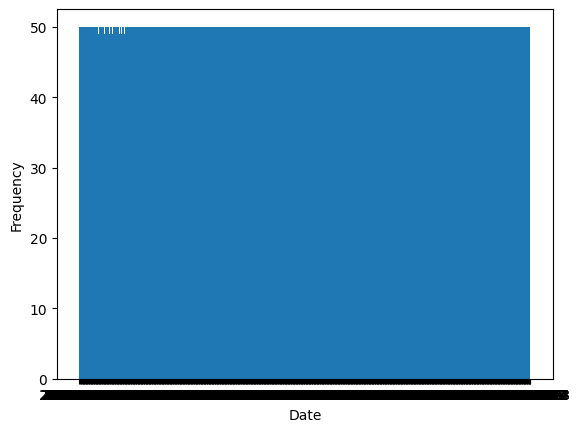

In [14]:
plt.hist(df_USA50['date'], bins=df_USA50['date'].nunique())
plt.xlabel("Date")
plt.ylabel("Frequency")

# Jungs euer feedback is gefragt !!!!!!!!!!!!!!!!
What could we do to see if the trend impacts the charts?
- we could aggregate the viral charts of 1 week or month to a metric thet describes in wich direction the trend is heding during the week
- to indicate in witch direction the trend of a chart is going we could calculate a score of the changes of position in Viral50 during this week 


Calculation example:
Week(2021-12-11) rank=9, Week(2021-12-18) rank=7

So the trend score of the week 2021-12-11 would be +2

In [15]:
#convert date column to datetime and subtract one week
pd.to_datetime(df_USA50['date'])

1494491    2021-12-11
1494492    2021-12-11
1494493    2021-12-11
1494494    2021-12-11
1494495    2021-12-11
              ...    
11494241   2020-08-23
11494242   2020-08-23
11494243   2020-08-23
11494244   2020-08-23
11494245   2020-08-23
Name: date, Length: 36532, dtype: datetime64[ns]

In [16]:
#convert date to datatype datetime
df_USA50['date'] = df_USA50['date'].astype('datetime64[ns]')

/tmp/ipykernel_27477/3544053798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA50['date'] = df_USA50['date'].astype('datetime64[ns]')


In [17]:
df_USA50.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
title                   object
rank                     int64
date            datetime64[ns]
artist                  object
url                     object
region                  object
chart                   object
trend                   object
streams                float64
dtype: object

In [26]:
# create 'week' table 
# It’s worth noting that by default, pandas assumes that the week starts the day after Sunday (W-SUN).
# https://www.statology.org/pandas-group-by-week/
df_weeks = df_USA50.groupby([pd.Grouper(key='date', freq='W')])

In [40]:
for name, week in df_weeks:
    print(name)
    
    for entry in week:
        

SyntaxError: incomplete input (3429625790.py, line 5)